## Exercise

1. Download the bone marrow / leukemia gene expression ן dataset (leukemia_small.csv) from https://web.stanford.edu/~hastie/CASI_files/DATA/leukemi a.html
2. Apply consensus hierarchical clustering and sparse NMF ן clustering to these patient data with k =2 clusters
3. Compare both clustering results in terms of cluster purity ן for AML and ALL patient groups. 

Author: Shreya Kapoor

In [35]:
import scipy
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import fcluster
import seaborn as sns
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import sys
from datetime import date



In [2]:
def make_dendogram(D): 
    Z = linkage(D, method='ward', metric='euclidean') 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot()
    plt.subplots_adjust(left=0.07, bottom=0.3, right=0.98, top=0.95,
    wspace=0, hspace=0)
    plt.xlabel('Cell Line')
    plt.ylabel('Distance')
    dendrogram(Z, leaf_rotation=90., leaf_font_size=10., labels = cells)

In [3]:
def make_mnh(Z, max_d, cells): 
  
    max_d = 180 #determined from one clustering iteration beforehand
    clusters = fcluster(Z, max_d, criterion='distance') #this helps us get the cluster number of each index. 
    #clusters = cut_tree(Z, n_clusters = 2)
    #print(clusters)
    dic = { cells[i] :clusters[i]  for i in range(len(clusters))}
    # we make the dictionary in order to determine for which columns we got the clusters that we did
    Mh = np.zeros((df.shape[1], df.shape[1]))
    Ih = np.zeros((df.shape[1], df.shape[1]))
    for i in range(df.shape[1]): #since we are clustering along cells
            for j in range(df.shape[1]): 
                  if df.columns[i] in d.columns: 
                        if df.columns[j] in d.columns: 
                              Ih[i][j] = 1 
                  #FINDING IF INDEXES I AND J BELONG TO THE SAME CLUSTER OR NOT. 
                  if df.columns[i] in dic.keys() and df.columns[j] in dic.keys(): 
                          if dic[df.columns[i]] == dic[df.columns[j]]: 
                                Mh[i][j] = 1
    return Mh, Ih

In [4]:
df = pd.read_csv('leukemia_small.csv')

In [5]:
df = df.reindex(sorted(df.columns), axis=1)

In [6]:
df.head()

,ALL,ALL.1,ALL.10,ALL.11,ALL.12,ALL.13,ALL.14,ALL.15,ALL.16,ALL.17,...,AML.22,AML.23,AML.24,AML.3,AML.4,AML.5,AML.6,AML.7,AML.8,AML.9
0,0.561549,-0.623141,-0.425078,0.073160,-0.586642,-0.668417,-0.632941,1.000113,-1.002407,-0.286922,...,-0.940462,-0.207155,0.062535,-0.392025,-0.772689,-0.838850,-0.577849,-0.361472,-0.689056,-0.572561
1,0.213566,-0.912107,1.443450,-0.286462,0.548776,-0.735544,-0.920912,-0.955369,-0.360956,-0.610005,...,-0.429690,-0.538333,-0.296009,-0.704443,-0.071978,0.824360,-0.871411,1.014612,-0.971334,1.253959
2,-0.636584,-0.465296,-0.266910,0.232140,-0.428738,-0.510645,2.899624,-0.513522,-0.845180,-0.128529,...,-0.783134,-0.048632,0.221498,-0.233803,-0.615088,4.848568,-0.419930,-0.203200,0.856071,4.321011
3,0.347124,-0.734345,-0.819089,-0.308939,0.389220,0.177846,2.935376,-0.799112,0.396926,-0.677630,...,-1.346795,-0.595956,-0.319818,-0.785246,-0.768358,4.139257,0.225747,-0.753962,0.420346,2.993526
4,0.545509,-0.539898,-1.186585,-1.679732,0.576774,1.853739,1.879105,0.320799,0.060844,0.400633,...,-0.664693,-0.936764,-0.345593,-0.983114,-0.270606,3.065135,-0.656098,-0.327707,0.139299,1.480559


In [7]:
#rows are genes 
#columns are denoting the class labels

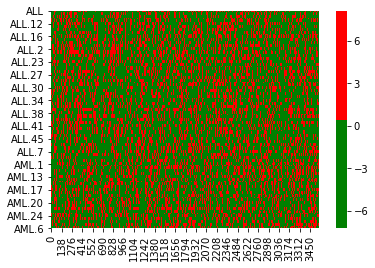

In [8]:
sns.heatmap(df.transpose() , cmap = ['green', 'red'])

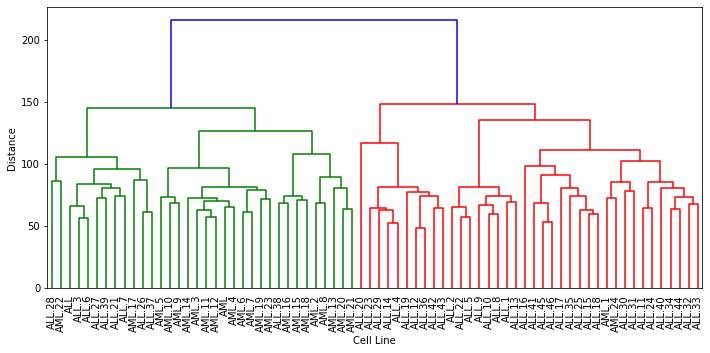

In [9]:
cells = list(df.columns.values) 
    #red is higher value and green is lower value 
D = df.values
cells = list(df.columns.values) 
if len(cells) != len(D):
        #scipy clusters the rows and not the columns
        #print ('transpose')
        D = np.transpose(D)
make_dendogram(D)

Main loop for getting the consensus matrix M

In [10]:
M = np.zeros((df.shape[1], df.shape[1]))
I = np.zeros((df.shape[1], df.shape[1]))
H = 10 #Number of subsamples that we want!
for h in range(H): 
    d = df.sample(int(0.8*df.shape[1]) , axis = 1) #subsampling the columns
    cells = list(d.columns.values) 

    #red is higher value and green is lower value 
    D = d.values
    cells = list(df.columns.values) 
  

    if len(cells) != len(D):
        #print ('transpose')
        D = np.transpose(D)

    Z = linkage(D, method='ward', metric='euclidean')
    #make the Mh matrix
    Mh, Ih = make_mnh(Z, 180, cells)
                        
    M += Mh
    I += Ih          
            
M = M/I
    


Observation
<br> ן
• 𝑀 is symmetric <br>
• 𝑀 has values in [0,1] where 1 means perfect consensus <br> 
• 𝑀 may be viewed as a similarity measure between items <br> 
• Reordering rows and columns in 𝑀 according to true clustering yields a block-diagonal <br> 
matrix

In [11]:
M.transpose() == M

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

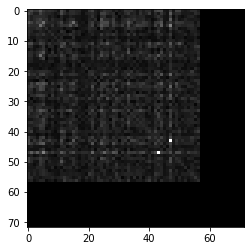

In [12]:
plt.imshow(M, cmap = 'gray')

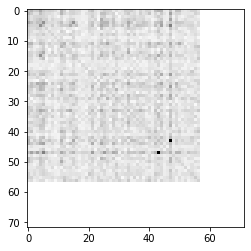

In [13]:
plt.imshow(1-M, cmap = 'gray')

#Final clustering can be achieved using 1-M as a distance matrix!

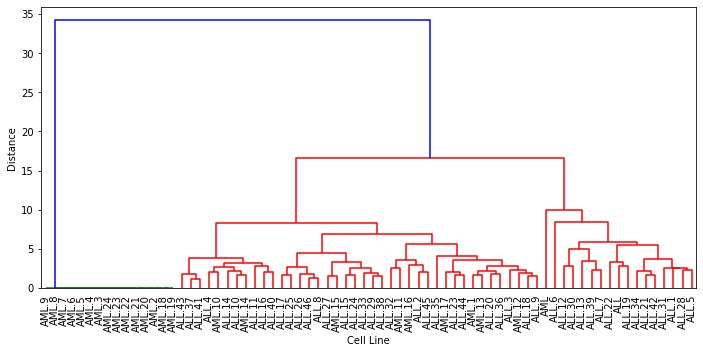

In [14]:
make_dendogram(1-M)

In [15]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)


In [16]:
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=42)
W = model.fit_transform(df)
H = model.components_


In [17]:
model.get_params()

{'alpha': 0.0,
 'beta_loss': 'frobenius',
 'init': 'random',
 'l1_ratio': 0.0,
 'max_iter': 200,
 'n_components': 2,
 'random_state': 42,
 'shuffle': False,
 'solver': 'cd',
 'tol': 0.0001,
 'verbose': 0}

l1_ratio == 0 implies that the l2 value is 1 and the penalty is only the Frobenious norm that introduces sparsity.

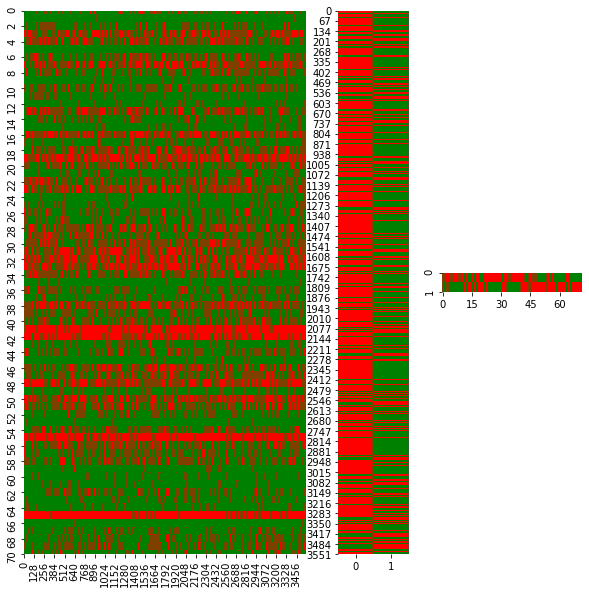

In [18]:
fig, ax = plt.subplots(1,3, gridspec_kw={'width_ratios':[2,0.5,1]}, figsize = (10,10))
ax = ax.ravel() 
ax[2].set_aspect(10)
ax[0] = sns.heatmap(df.transpose(), cmap = ['green', 'red'], ax = ax[0], cbar = False)
ax[1] = sns.heatmap(W, cmap = ['green', 'red'], ax = ax[1], cbar = False)
ax[2] = sns.heatmap(H, cmap = ['green', 'red'], ax= ax[2], cbar = False)
plt.show()

 The samples need to be reordered in order to better show the class distributions

In [19]:
#better representation if we sort the columns according to column name!

Text(0, 0.5, 'meta gene expression profile!')

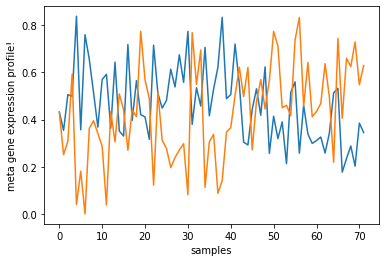

In [20]:
plt.plot(range(72), H[0])
plt.plot(range(72), H[1])
plt.xlabel('samples')

plt.ylabel('meta gene expression profile!')


The relative amplitudes of the two metagenes determine two classes of samples, class 1 and class 2. 

Text(0, 0.5, 'meta gene expression profile!')

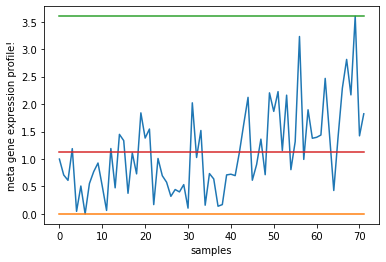

In [21]:
plt.plot(range(72), H[1]/H[0])
plt.plot(range(72), [min(H[1]/H[0]) for x in H[1]/H[0]])
plt.plot(range(72), [max(H[1]/H[0]) for x in H[1]/H[0]])
plt.plot(range(72), [sum(H[1]/H[0])/72 for x in H[1]/H[0]])
plt.xlabel('samples')
plt.ylabel('meta gene expression profile!')
#Higher means class 1, lowe means class 0 


In [22]:
matrix = [x/y if y!=0 else x for x,y in zip(H[1],H[0])]
avg_expr = sum(matrix)/72

In [23]:
classes_nmf = np.array([1 if x>avg_expr else 0 for x in matrix])

Implies 47 are ALL and rest are AML so till index 47 is class 1 <br> 
and later is class 2 i.e. AML

From the original paper: https://www.pnas.org/content/101/12/4164 <br>  
    For each run, the sample assignment can be defined by a connectivity matrix C of size M × M, with entry cij = 1 if samples i and j belong to the same cluster, and cij = 0 if they belong to different clusters. We can then compute the consensus matrix, C̄, defined as the average connectivity matrix over many clustering runs. 
    

In [24]:
C = np.zeros((len(df.columns), len(df.columns)))

In [25]:
for i in range(len(classes_nmf)): 
    for j in range(len(classes_nmf)):
        if classes_nmf[i] == classes_nmf[j]: 
             C[i][j] = 1

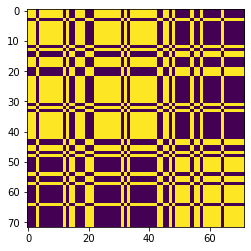

In [26]:
plt.imshow(C)

In [27]:
# This whole process can be done 50 times to get K=2 avg clustering!

In [28]:
def iterate_nmf(df, iterations): 
    C_total = np.zeros((len(df.columns), len(df.columns)))
    for i in range(iterations): 
        model = NMF(n_components=2, init='random', random_state=i)
        W = model.fit_transform(df)
        H = model.components_
        matrix = [x/y if y!=0 else x for x,y in zip(H[1],H[0])] #relative expression
        avg_expr = sum(matrix)/72
        classes_nmf = np.array([1 if x>avg_expr else 0 for x in matrix])
        C = np.zeros((len(df.columns), len(df.columns)))
        for i in range(len(classes_nmf)): 
            for j in range(len(classes_nmf)):
                    if classes_nmf[i] == classes_nmf[j]: 
                         C[i][j] = 1
        C_total += C
    return C_total/iterations


In [29]:
C_total = iterate_nmf(df,50)

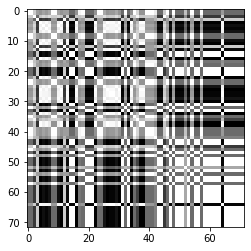

In [30]:
plt.imshow(C_total, cmap = 'gray')